In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR

In [2]:
covid = pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type:",covid.dtypes)

Size/Shape of the dataset (18327, 8)
Checking for null values:
 SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type: SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [4]:
#Dropping the column SNO
covid.drop(["SNo"],1,inplace = True)

In [5]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])
print("Checking Data-type:",covid.dtypes)

Checking Data-type: ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object


In [6]:
#Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":"sum","Deaths":'sum'})
print(datewise)

                 Confirmed  Recovered    Deaths
ObservationDate                                
2020-01-22           555.0       28.0      17.0
2020-01-23           653.0       30.0      18.0
2020-01-24           941.0       36.0      26.0
2020-01-25          1438.0       39.0      42.0
2020-01-26          2118.0       52.0      56.0
...                    ...        ...       ...
2020-04-20       2472259.0   645738.0  169986.0
2020-04-21       2549123.0   679819.0  176583.0
2020-04-22       2623960.0   709694.0  183066.0
2020-04-23       2708885.0   738486.0  190858.0
2020-04-24       2811193.0   793601.0  197159.0

[94 rows x 3 columns]


In [7]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recoverd cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Deaths cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Basic Information
Total number of Confirmed cases around the world 2811193.0
Total number of Recoverd cases around the world 793601.0
Total number of Deaths cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

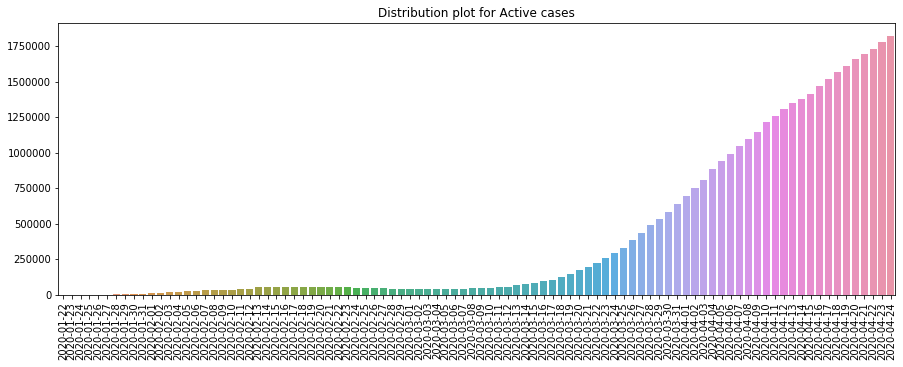

In [8]:
plt.figure(figsize=(15,5)) 
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for Active cases") 
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

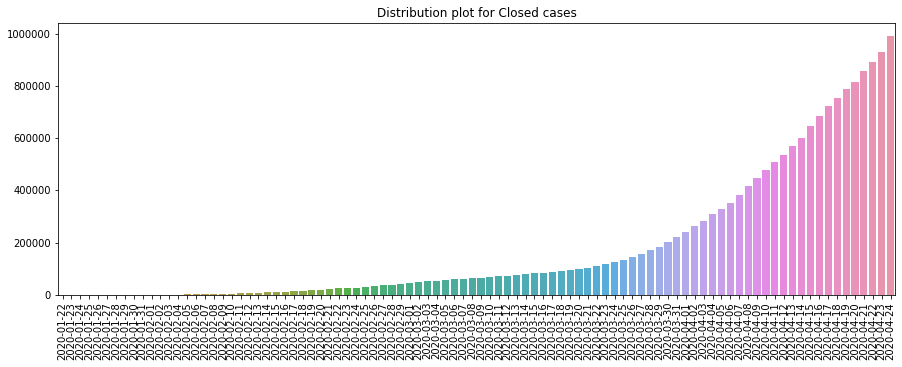

In [9]:

plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed cases")
plt.xticks(rotation=90)

                 Confirmed  Recovered    Deaths  WeekofYear
ObservationDate                                            
2020-01-22           555.0       28.0      17.0           4
2020-01-23           653.0       30.0      18.0           4
2020-01-24           941.0       36.0      26.0           4
2020-01-25          1438.0       39.0      42.0           4
2020-01-26          2118.0       52.0      56.0           4
...                    ...        ...       ...         ...
2020-04-20       2472259.0   645738.0  169986.0          17
2020-04-21       2549123.0   679819.0  176583.0          17
2020-04-22       2623960.0   709694.0  183066.0          17
2020-04-23       2708885.0   738486.0  190858.0          17
2020-04-24       2811193.0   793601.0  197159.0          17

[94 rows x 4 columns]
[2118.0, 16787.0, 40151.0, 71226.0, 78985.0, 88371.0, 109835.0, 167447.0, 337122.0, 720140.0, 1272115.0, 1846680.0, 2401379.0, 2811193.0]
[52.0, 472.0, 3244.0, 10865.0, 23394.0, 42716.0, 60695.0, 7

Text(0.5, 1.0, 'Weekly Progress of different types of cases')

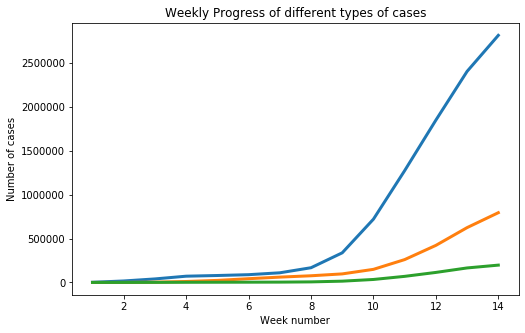

In [10]:
datewise["WeekofYear"] = datewise.index.weekofyear
print(datewise)
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w = w+1
print(weekwise_confirmed)
print(weekwise_recovered)
print(weekwise_deaths)
print(week_num)
plt.figure(figsize = (8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth = 3)
plt.plot(week_num,weekwise_deaths,linewidth = 3)
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")


Average increase in number of Confirmed cases everyday 29900.0
Average increase in number of Recovered cases everyday 8442.0
Average increase in number of Deaths cases everyday 2097.0


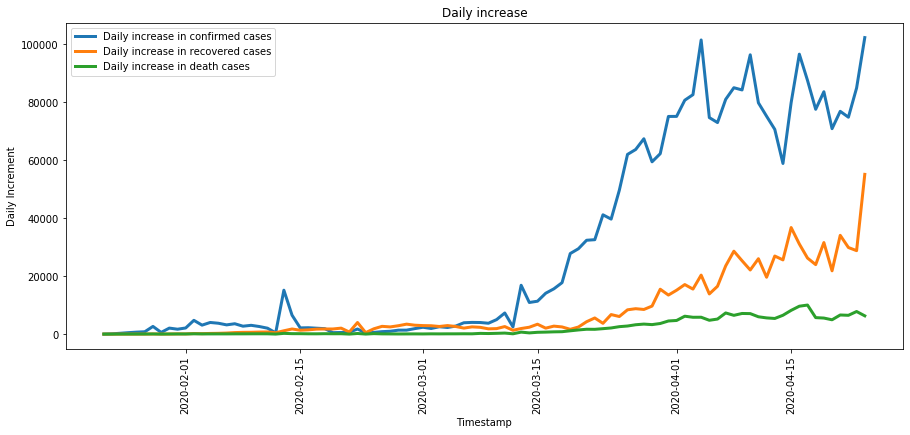

In [11]:
plt.figure(figsize = (15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth = 3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth = 3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth = 3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase")
plt.xticks(rotation=90)
plt.legend()

print("Average increase in number of Confirmed cases everyday",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday",np.round(datewise["Deaths"].diff().fillna(0).mean()))

In [12]:
#Calculating the country wise mortality rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending =False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
print(countrywise)
print(covid)

                       Confirmed  Recovered   Deaths  Mortality    Recovery
Country/Region                                                             
US                      905333.0    99079.0  51949.0   5.738110   10.943929
Spain                   219764.0    92355.0  22524.0  10.249176   42.024626
Italy                   192994.0    60498.0  25969.0  13.455859   31.347089
France                  159952.0    44271.0  22279.0  13.928554   27.677678
Germany                 154999.0   109800.0   5760.0   3.716153   70.839167
...                          ...        ...      ...        ...         ...
Bhutan                       7.0        3.0      0.0   0.000000   42.857143
Western Sahara               6.0        5.0      0.0   0.000000   83.333333
South Sudan                  5.0        0.0      0.0   0.000000    0.000000
Sao Tome and Principe        4.0        0.0      0.0   0.000000    0.000000
Yemen                        1.0        1.0      0.0   0.000000  100.000000

[187 rows x

Text(0.5, 1.0, 'Top15 countries as per number of death cases')

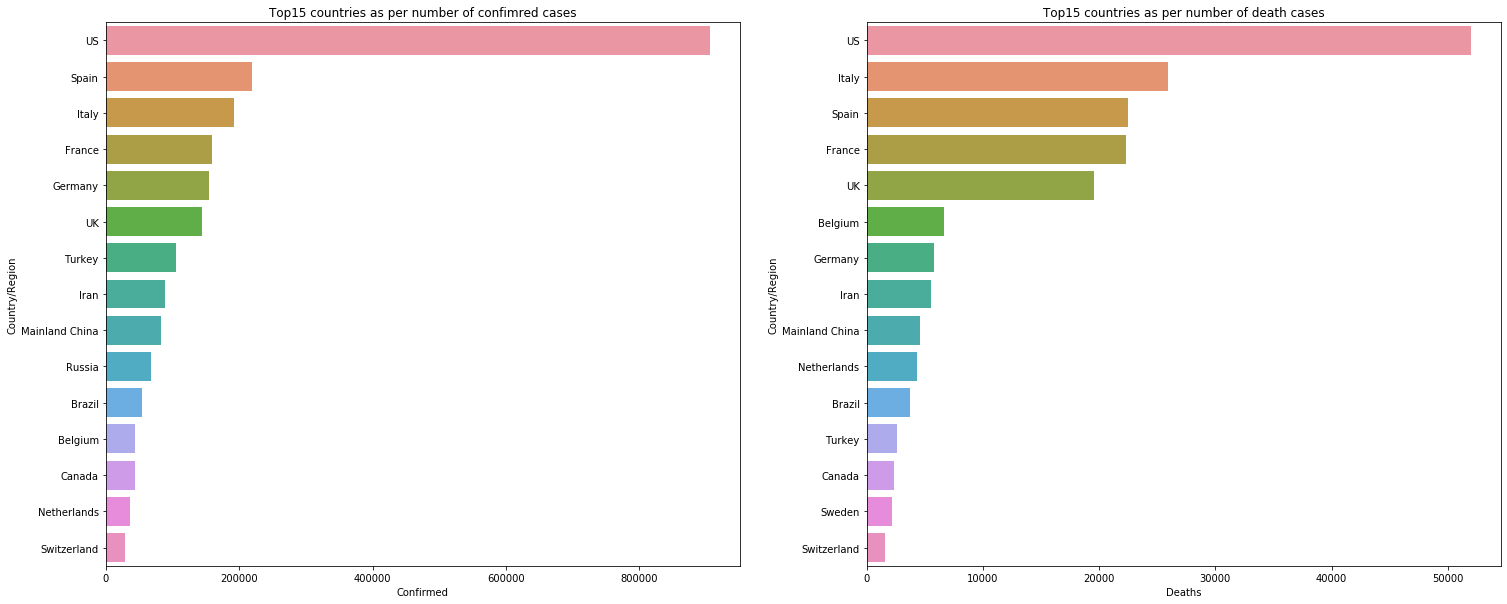

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top15 countries as per number of confimred cases")
sns.barplot(x = top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top15 countries as per number of death cases")


In [14]:
#Data Analysis for India
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Actvie Cases:",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Actvie Cases: 18252.0
Total Closed cases 6278.0


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

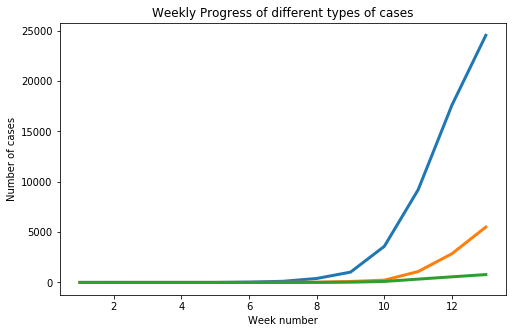

In [15]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w = w+1
plt.figure(figsize = (8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth = 3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3)
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [16]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
print(china_data)
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_china)
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain = spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed cases to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed cases to India")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed cases to India")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed cases to India")

      ObservationDate Province/State  Country/Region          Last Update  \
0          2020-01-22          Anhui  Mainland China      1/22/2020 17:00   
1          2020-01-22        Beijing  Mainland China      1/22/2020 17:00   
2          2020-01-22      Chongqing  Mainland China      1/22/2020 17:00   
3          2020-01-22         Fujian  Mainland China      1/22/2020 17:00   
4          2020-01-22          Gansu  Mainland China      1/22/2020 17:00   
...               ...            ...             ...                  ...   
18310      2020-04-24        Tianjin  Mainland China  2020-04-25 06:31:19   
18311      2020-04-24          Tibet  Mainland China  2020-04-25 06:31:19   
18323      2020-04-24       Xinjiang  Mainland China  2020-04-25 06:31:19   
18325      2020-04-24         Yunnan  Mainland China  2020-04-25 06:31:19   
18326      2020-04-24       Zhejiang  Mainland China  2020-04-25 06:31:19   

       Confirmed  Deaths  Recovered  
0            1.0     0.0        0.0  

In [17]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml = datewise.iloc[int(datewise.shape[0]*0.90):]
valid_ml_y=valid_ml['Confirmed']
model_scores = []
print(datewise)

                 Confirmed  Recovered    Deaths  WeekofYear  Days Since
ObservationDate                                                        
2020-01-22           555.0       28.0      17.0           4           0
2020-01-23           653.0       30.0      18.0           4           1
2020-01-24           941.0       36.0      26.0           4           2
2020-01-25          1438.0       39.0      42.0           4           3
2020-01-26          2118.0       52.0      56.0           4           4
...                    ...        ...       ...         ...         ...
2020-04-20       2472259.0   645738.0  169986.0          17          89
2020-04-21       2549123.0   679819.0  176583.0          17          90
2020-04-22       2623960.0   709694.0  183066.0          17          91
2020-04-23       2708885.0   738486.0  190858.0          17          92
2020-04-24       2811193.0   793601.0  197159.0          17          93

[94 rows x 5 columns]


In [18]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree = 6,kernel= 'poly',epsilon=0.01)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1),)
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [20]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x:'%.f' %x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LINEAR REGRSN","SVM PREDICTION"])
model_predictions.head(10)

,Dates,LINEAR REGRSN,SVM PREDICTION
0,2020-04-25,1309207,4719463
1,2020-04-26,1327070,5025923
2,2020-04-27,1344933,5348945
3,2020-04-28,1362796,5689235
4,2020-04-29,1380659,6047526
5,2020-04-30,1398522,6424571
6,2020-05-01,1416385,6821147
7,2020-05-02,1434248,7238055
8,2020-05-03,1452111,7676121
9,2020-05-04,1469974,8136196
